In [100]:
from datasets import load_dataset
import pandas as pd
import os
from utils.filemanagement import load_from_file,save_preprocessed_df_to_file
import matplotlib.pyplot as plt
from utils.filemanagement import ROOT_PATH
from nltk.tokenize import word_tokenize

In [101]:
folder_path_data = r"preprocessed_data"
file_name_previous_data ="np_large_basic.csv"
file_name_data ="np_large_stopwords.csv"

file_path = os.path.join(ROOT_PATH,folder_path_data,"data",str(file_name_previous_data))
df = pd.read_csv(file_path,index_col=0,encoding="utf-8")
#df_one = load_from_file(folder_path_data, file_name_data,index_col=0)

file_path_load = os.path.join(ROOT_PATH,folder_path_data,"data",str(file_name_data))

#df = pd.read_csv(file_path_load,index_col=0,encoding="utf-8")

In [102]:
df.head()

,text,label,date
0,Hvis ingen har noe å innvende skal jeg etterko...,1998,1998-01-01
1,Fungerende president vil anmode sekretæren for...,1998,1998-01-01
2,Odelstinget skal foreta valg av presidenter og...,1998,1998-01-01
3,Jeg foreslår Gunnar Skaug,1998,1998-01-01
4,Gunnar Skaug er foreslått valgt til Odelstinge...,1998,1998-01-01


In [103]:
stopwords = []
with open("stopwords.txt","r",encoding="utf-8") as file:
    for line in file:
        stopwords.append(line.strip())

In [104]:
data = df.text.values.tolist()

In [105]:
new_data = []
import time
st = time.time()
for item in data:
    item = str(item).lower()
    word_tokens = word_tokenize(item)
    filtered_sentence = [w for w in word_tokens if not w in stopwords]
    new_data.append(" ".join(filtered_sentence))
et = time.time()
print(et-st)

573.6402504444122


In [106]:
#df['text'] = new_data

In [107]:
df['text'] = new_data

In [108]:
file_path_save = os.path.join(ROOT_PATH,folder_path_data,"data",file_name_data)
df.to_csv(file_path_save,encoding="utf-8")

In [109]:
#save_preprocessed_df_to_file(folder_path_data,"basic_parlamint.csv",df)

In [110]:
#df = load_from_file(folder_path_data,file_name_data,index_col=0)

In [111]:
df.describe()

,label
count,386795.000000
mean,2010.553671
std,7.108579
min,1998.000000
25%,2004.000000
50%,2011.000000
75%,2017.000000
max,2022.000000


In [112]:
df.head()

,text,label,date
0,innvende etterkomme anmodningen,1998,1998-01-01
1,fungerende president anmode sekretæren forrige...,1998,1998-01-01
2,odelstinget foreta valg presidenter sekretærer...,1998,1998-01-01
3,foreslår gunnar skaug,1998,1998-01-01
4,gunnar skaug foreslått valgt odelstingets pres...,1998,1998-01-01


In [113]:
df.text.map(len).max()

58960

In [114]:
df.text.map(len).min()

0

In [115]:
import numpy as np
lengths = df["text"].str.len()
argmax = np.where(lengths == lengths.max())[0]
df.iloc[argmax]

,text,label,date
347520,debatten 223 forslag forslagene nr 150 hadia t...,2020,2020-01-01


In [116]:
lengths = df["text"].str.len()
argmax = np.where(lengths == lengths.min())[0]
df.iloc[argmax]

,text,label,date
56,,1998,1998-01-01
428,,1998,1998-01-01
768,,1998,1998-01-01
882,,1998,1998-01-01
1225,,1998,1998-01-01
...,...,...,...
385331,,2022,2022-01-01
386044,,2022,2022-01-01
386296,,2022,2022-01-01
386354,,2022,2022-01-01


In [117]:
df['date'].unique()

array(['1998-01-01', '1999-01-01', '2000-01-01', '2001-01-01',
       '2002-01-01', '2003-01-01', '2004-01-01', '2005-01-01',
       '2006-01-01', '2007-01-01', '2008-01-01', '2009-01-01',
       '2010-01-01', '2011-01-01', '2012-01-01', '2013-01-01',
       '2014-01-01', '2015-01-01', '2016-01-01', '2017-01-01',
       '2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01',
       '2022-01-01'], dtype=object)

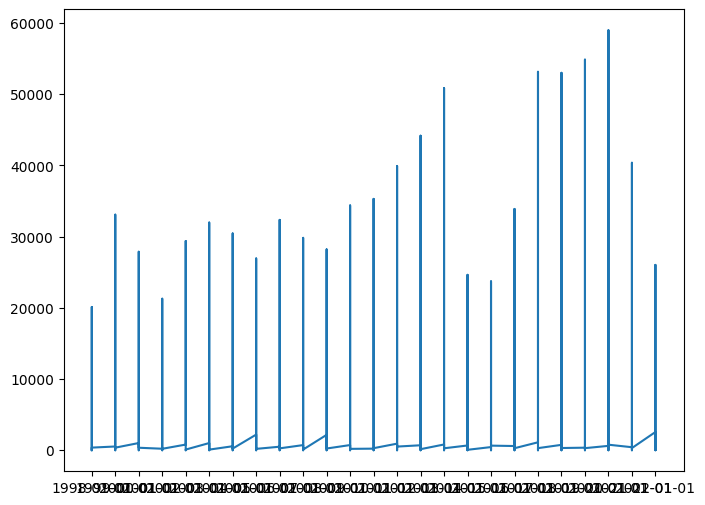

In [118]:
data = df["text"].str.len()

fig,ax = plt.subplots(figsize=(8,6))
ax.plot(df['date'],data)

df['date'] =pd.to_datetime(df['date'])

In [119]:
df.date

0        1998-01-01
1        1998-01-01
2        1998-01-01
3        1998-01-01
4        1998-01-01
            ...    
386792   2022-01-01
386793   2022-01-01
386794   2022-01-01
386795   2022-01-01
386796   2022-01-01
Name: date, Length: 386795, dtype: datetime64[ns]

In [120]:
vocab = set()
df['text'].str.lower().str.split().apply(vocab.update)
print(f"Length of vocab: {len(vocab)}")

Length of vocab: 523405


In [121]:
print(f"Max tokens: {df.text.map(len).max()}")

Max tokens: 58960


In [122]:
print(f"Min tokens: {df.text.map(len).min()}")

Min tokens: 0


In [123]:
vocabulary = list(vocab)

In [124]:
with open('your_file.txt', 'w',encoding="utf-8") as f:
    for line in vocabulary:
        f.write("%s\n" % line)

In [125]:
r = list(df['text'])

In [126]:
print(vocabulary[0:1000])

['esakravet', 'sekretærutdanningene', 'konkurranseelementer', 'togproblematikk', 'israelvenner', 'tomatar', '00074arealavgift', 'naudslakt', 'bagasjerommet', 'vaksinasjonsrådgivning', 'gaddafiregimets', 'vertskapsforpliktelser', 'trafikkulykken', 'jevnt', 'kiorovdistriktet', 'utleiereglenes', 'tilbakeføringstransporter', 'dagsordenspunktet', 'sentraliseringslinjen', 'bombardert', 'uttaleorgan', 'bostøtteendringen', 'tsjetsjenerne', 'frådelingsspørsmål', '01012013', '1312', 'säkerhetspolisen', 'hilmar', 'brokryssinger', 'avisreportasjen', 'frontkollisjoners', 'ventetidslister', 'regionledelsen', 'karantenetiltak', 'fradragsført', 'eiendomsmeglertjenester', 'jubileumsuken', 'bjerkreimselva', 'tyverisikkerhet', 'diskrimineres', 'omsetningsbortfallet', 'utdefinert', 'bunninnretninger', 'transplantasjonsteknologi', 'vågeng', 'fylkeslandbruksstyrer', 'strontium90', 'pisten', 'hybridfiskefartøy', 'gasskraftkonsesjonen', 'jernbaneutbedring', 'kommersialiseringsfasen', 'gebyrsiden', 'hamneprosj

In [127]:
res = 0
for item in r:
    res+= len(item)
print(f"Tokens in dataset: {res}") # helt feil teller med mellomrom osv \n også

Tokens in dataset: 291364127


In [128]:
from utils.dataset_stats import get_data_stats
from utils.filemanagement import write_dataset_stats

stats = get_data_stats(df['text'])
print(stats)

write_dataset_stats(folder_path_data,file_name_data,stats)

[386795, 523405, 31352260, 59.90057412519941, 81.05652865212839, 0.0, 10627, 0]
